In [8]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils import to_categorical

import matplotlib.pyplot as pl

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



In [9]:
print ("x_train row 0",x_train.shape,x_train[0])
print ("y_train row 0",y_train[0])
num_pixels = x_train.shape[1] * x_train.shape[2]*x_train.shape[3]
#x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
#x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
x_train=x_train/255
x_test=x_test/255
print(num_pixels)
print (x_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)


x_train row 0 (50000, 32, 32, 3) [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
y_train row 0 [6]
3072
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058

In [129]:

def classification_model():
  model = Sequential()
  model.add(Conv2D(128, (5, 5), input_shape=(32,32,3),padding="same" ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (5, 5),padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (5, 5),padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,))),
  model.add(Flatten())
  #model.add(Dense(100, activation='relu'))
  #model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [147]:
model1 = classification_model()
model1.summary()
model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=32, epochs=20, verbose=2)


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 16, 16, 64)        204864    
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 4, 4, 32)       

In [149]:
scores = model1.evaluate(x_test, y_test, verbose=0)
print('Model Accuracy: {} \n Error: {}'.format(scores[1], 1 - scores[1]))

Model Accuracy: 0.6992999911308289 
 Error: 0.30070000886917114


In [156]:
model2 = classification_model()
model2.summary()
model2.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=32, epochs=30, verbose=2)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 16, 16, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 16, 16, 64)        204864    
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 4, 4, 32)       

In [158]:
scores = model2.evaluate(x_test, y_test, verbose=0)
print('Model Accuracy: {} \n Error: {}'.format(scores[1], 1 - scores[1]))

Model Accuracy: 0.7088000178337097 
 Error: 0.2911999821662903


The accuracy is much better with the CNN.  I am acheiving training accuracies of ~93.3% and test accuracies over 70.8%  my best result was 72.4% test accuracy but I don't have that showing because the way I got that was using an additional dense layer which was not part of the excercise. I believe I could achieve this with just CNN layers but the time it takes to run is prohibitive as it took over an hour to get the above result. Even with fewer convolution layers I was getting a massive improvement over the neural net in excercise 3.

313/313 [==============================] - 15s 44ms/step


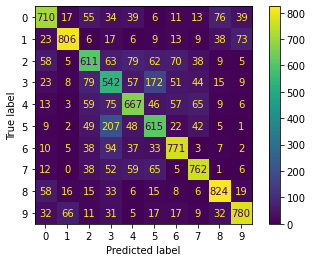

In [159]:
labels_map = {
  0: 'Airplane',
  1: 'Automobile',
  2: 'Bird',
  3: 'Cat',
  4: 'Deer',
  5: 'Dog',
  6: 'Frog',
  7: 'Horse',
  8: 'Ship',
  9: 'Truck',
}

import sklearn.metrics as metrics
model=model2
y_pred = model.predict(x_test)  

y_pred_labels = np.argmax(y_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

cm = metrics.confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred_labels) 
 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

From the confusion matrix we can see the biggest source is dogs(5) and cats(3) being misclassified as each other which makes sense due to their similarities.  Birds seem to be confused for other animals and airplanes quite often but not for automobiles or trucks which leads me to think the CNN is seeing the sharp lines of man made objects and able to distinguish from the animals but the blue background of ships and airplanes is enough to confuse since most of the other animals are not confused for any manmade objects very often.  

In [160]:
Z1=np.random.randint(10000)
Z2=np.random.randint(10000)
Z3=np.random.randint(10000)
predicted_vector1 = model(np.expand_dims(x_test[Z1], axis=0))
predicted_vector2 = model(np.expand_dims(x_test[Z2], axis=0))
predicted_vector3 = model(np.expand_dims(x_test[Z3], axis=0))
predicted_index1 = np.argmax(predicted_vector1)
predicted_index2 = np.argmax(predicted_vector2)
predicted_index3 = np.argmax(predicted_vector3)
print ("The Convolutional Neural Net Thinks its a:",labels_map[predicted_index1])
print ("The image is a:",labels_map[np.argmax(y_test[Z1])])
print ("The Convolutional Neural Net Thinks its a:",labels_map[predicted_index2])
print ("The image is a:",labels_map[np.argmax(y_test[Z2])])
print ("The Convolutional Neural Net Thinks its a:",labels_map[predicted_index3])
print ("The image is a:",labels_map[np.argmax(y_test[Z3])])

The Convolutional Neural Net Thinks its a: Horse
The image is a: Horse
The Convolutional Neural Net Thinks its a: Ship
The image is a: Ship
The Convolutional Neural Net Thinks its a: Automobile
The image is a: Automobile
